Enter number of edges:  7
Enter edge (u v weight):  1 2 3
Enter edge (u v weight):  1 3 1
Enter edge (u v weight):  2 3 7
Enter edge (u v weight):  2 4 5
Enter edge (u v weight):  3 4 2
Enter edge (u v weight):  3 5 4
Enter edge (u v weight):  4 5 6
Enter the start node for Prim's Algorithm:  1


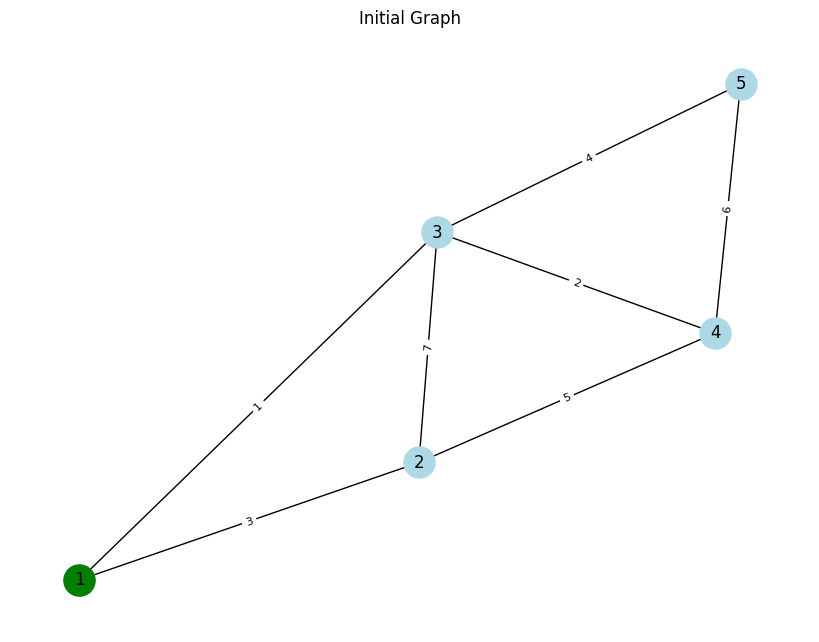

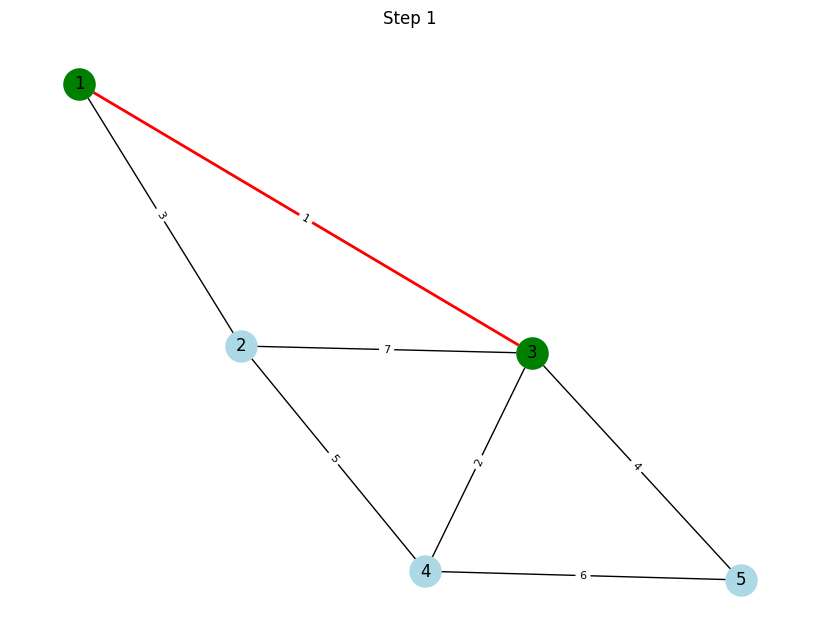

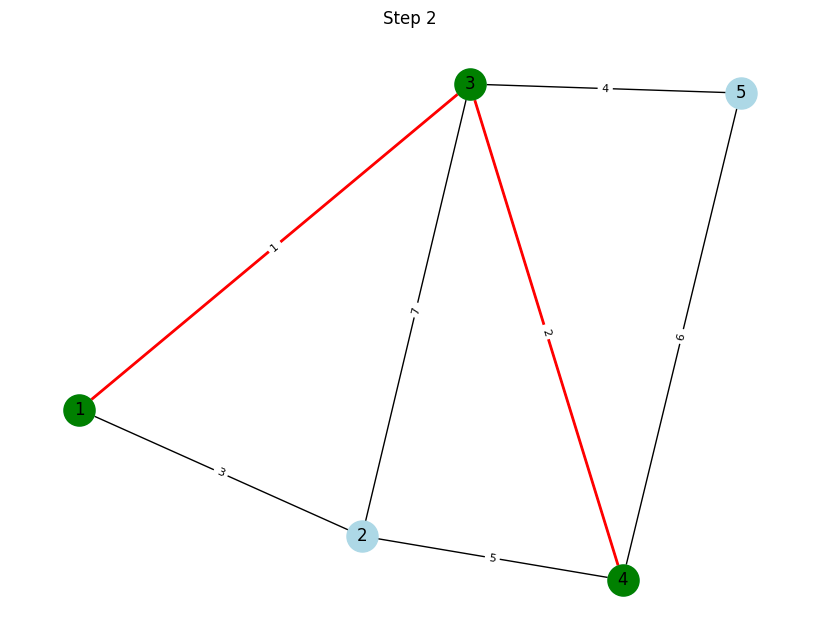

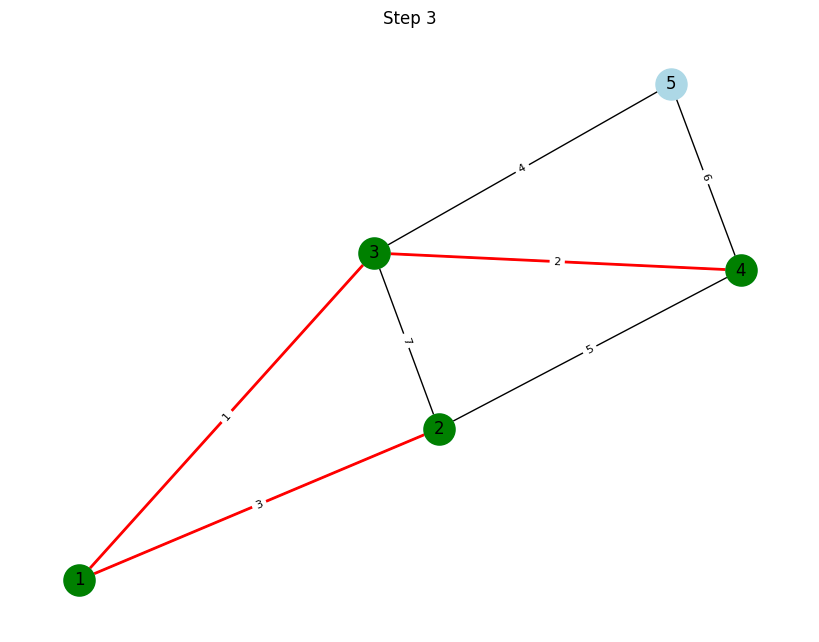

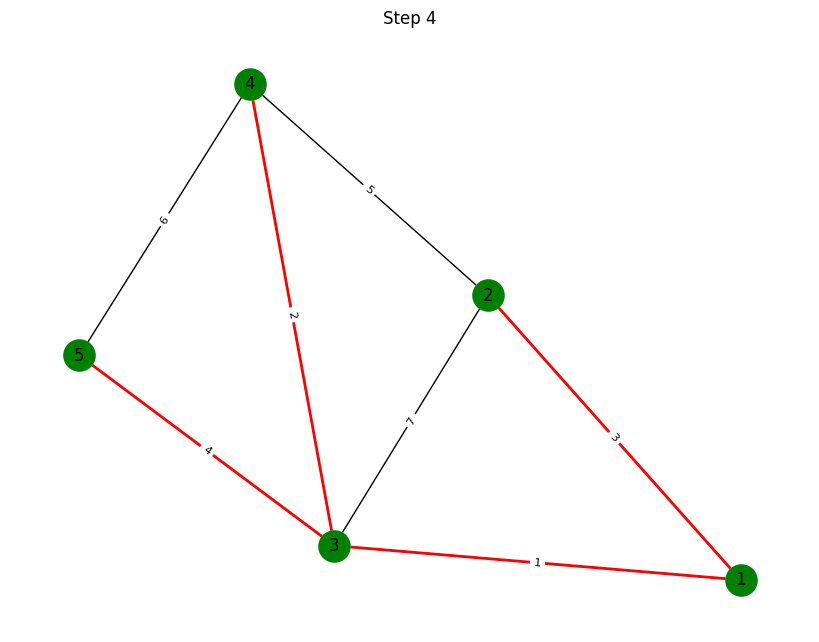

Minimum Spanning Tree edges: [(1, 3, 1), (3, 4, 2), (1, 2, 3), (3, 5, 4)]


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import time

def prim_mst(graph, start_node):
    """
    Perform Prim's algorithm to find the MST and visualize each step.
    """
    mst_edges = []  # To store the edges in the MST
    visited = set([start_node])  # Set to keep track of visited nodes
    all_edges = list(graph.edges(data=True))  # List of all edges in the graph

    # Show the initial graph before starting Prim’s Algorithm
    visualize_graph(graph, mst_edges, visited, title="Initial Graph")

    while len(visited) < len(graph.nodes):  # While not all nodes are in the MST
        min_edge = None
        min_weight = float('inf')

        # Check all edges for the minimum weight edge that connects a visited node to a non-visited node
        for u, v, data in all_edges:
            if u in visited and v not in visited:
                weight = data['weight']
                if weight < min_weight:
                    min_weight = weight
                    min_edge = (u, v, weight)
            elif v in visited and u not in visited:
                weight = data['weight']
                if weight < min_weight:
                    min_weight = weight
                    min_edge = (v, u, weight)

        if min_edge:
            u, v, weight = min_edge
            mst_edges.append((u, v, weight))  # Add the minimum weight edge to the MST
            visited.add(v)  # Mark the new node as visited

            # Visualize the graph after adding the new edge to the MST
            visualize_graph(graph, mst_edges, visited, title=f"Step {len(mst_edges)}")
            time.sleep(1)  # Pause for a moment to show the step

    return mst_edges

def visualize_graph(graph, mst_edges, visited, title="Graph Visualization"):
    """
    Visualize the graph and the MST after each step.
    """
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)  # Generate layout for consistency

    # Draw the full graph with edges in black
    nx.draw(graph, pos, with_labels=True, node_size=500,
            node_color='lightblue', font_size=12, edge_color='black', width=1)

    # Highlight MST edges in red
    nx.draw_networkx_edges(graph, pos, edgelist=[(u, v) for u, v, w in mst_edges],
                           edge_color='red', width=2)

    # Highlight visited nodes in green
    nx.draw_networkx_nodes(graph, pos, nodelist=visited, node_color='green', node_size=500)

    # Display edge weights
    edge_labels = {(u, v): data['weight'] for u, v, data in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    plt.title(title)
    plt.show()

# Input graph from the user
graph = nx.Graph()
num_edges = int(input("Enter number of edges: "))

# Get the edges from the user
for _ in range(num_edges):
    u, v, weight = map(int, input("Enter edge (u v weight): ").split())
    graph.add_edge(u, v, weight=weight)

start_node = int(input("Enter the start node for Prim's Algorithm: "))

# Run Prim's Algorithm to find MST and visualize
mst = prim_mst(graph, start_node)
print("Minimum Spanning Tree edges:", mst)
